<a href="https://colab.research.google.com/github/Xyfalix/SpaceRaceAnalysis/blob/main/Day_98_Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
# exclude column index 0 and 1 from the duplicate check
columns_to_exclude = [0, 1]
columns_to_check = df_data.columns[~df_data.columns.isin(df_data.columns[columns_to_exclude])]
# check for duplicate values
duplicates = df_data[columns_to_check].duplicated(keep=False)

# Locate the indices of duplicated rows
print(df_data[duplicates])
duplicated_indices = df_data[duplicates].index
print(duplicated_indices)

     Unnamed: 0.1  Unnamed: 0 Organisation  \
792           792         792         CASC   
793           793         793         CASC   

                                              Location  \
792  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
793  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   

                           Date                                      Detail  \
792  Wed Nov 05, 2008 00:15 UTC  Long March 2D | Shiyan-3 & Chuangxin-1(02)   
793  Wed Nov 05, 2008 00:15 UTC  Long March 2D | Shiyan-3 & Chuangxin-1(02)   

    Rocket_Status  Price Mission_Status  
792  StatusActive  29.75        Success  
793  StatusActive  29.75        Success  
Int64Index([792, 793], dtype='int64')


In [ ]:
# Remove duplicated rows and keep the first occurrence
df_data_cleaned = df_data[columns_to_check].drop_duplicates(keep='first')

# check that duplicated rows have been removed
print(df_data_cleaned[columns_to_check].duplicated().value_counts())

# Display the DataFrame with duplicated rows removed
df_data_cleaned.shape

False    4323
dtype: int64


(4323, 7)

## Descriptive Statistics

In [ ]:
df_data_cleaned.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
organisation = df_data_cleaned['Organisation'].unique()
count = df_data_cleaned['Organisation'].value_counts()

# Create the bar chart
fig = px.bar(df_data_cleaned, x=organisation, y=count, color=count,
             color_continuous_scale='Aggrnyl')
# Update x-axis label
fig.update_xaxes(title_text='Organisation')

# Update y-axis label
fig.update_yaxes(title_text='Number of Launches')

# Rotate x-axis labels by 45 degrees
fig.update_layout(xaxis_tickangle=45)

# Change the plot title
fig.update_layout(title='Number of Space Launches by Organisation')

# hide the color axis
fig.update_layout(coloraxis_showscale=False)

fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
df_data_cleaned['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      789
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_data_cleaned['Mission_Status'].value_counts()

Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
# remove the null value in the 'Price' column
na_price_removed = df_data_cleaned.dropna(subset=['Price'], inplace=False)
# check for NaN values in the dataset
print(na_price_removed.isna().sum())

Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64


<ipython-input-24-2fd0c2e033f3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-2fd0c2e033f3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



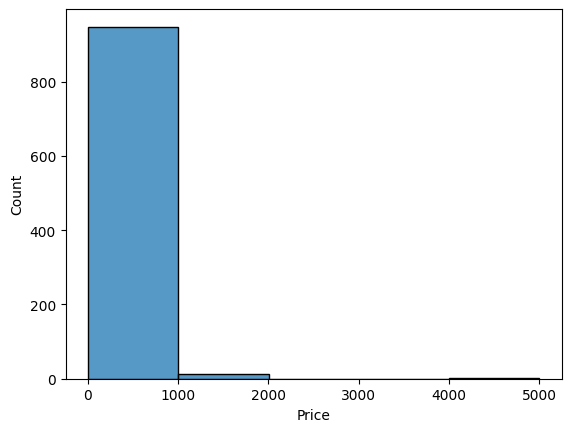

In [ ]:
# remove commas from values that have it for conversion to float later. Comment out after operation is done.
na_price_removed['Price'] = na_price_removed['Price'].str.replace(',', '')

# Convert the column to float data type
na_price_removed['Price'] = na_price_removed['Price'].astype(float)

# Check the data type of the column
price_dtype = na_price_removed['Price'].dtype

price_histogram = sns.histplot(data=na_price_removed, x="Price", bins=5)
# x_tick_labels = price_histogram.get_xticklabels()
# price_histogram.set_xticklabels(x_tick_labels, rotation=40)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
unique_locations = df_data_cleaned['Location'].unique()
countries_loc = []
for location in unique_locations:
  country = location.split(',')[-1].strip()
  countries_loc.append(country)
  
unique_countries = set(countries_loc)
print(unique_countries)

{'Russia', 'Barents Sea', 'Brazil', 'North Korea', 'Kazakhstan', 'India', 'France', 'Iran', 'Yellow Sea', 'New Mexico', 'South Korea', 'New Zealand', 'Australia', 'Gran Canaria', 'Kenya', 'Pacific Missile Range Facility', 'USA', 'Israel', 'Japan', 'Shahrud Missile Test Site', 'Pacific Ocean', 'China'}


In [ ]:
# Iterate over the countries and print their names
for country in countries:
    print(country.name)

Afghanistan
Åland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia, Plurinational State of
Bonaire, Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Bouvet Island
Brazil
British Indian Ocean Territory
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cabo Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo
Congo, Democratic Republic of the
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands (Malvinas)
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
French Southern Territories
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenl

In [ ]:
# Transform the locations inside the dataframe into countries by retrieving the last split value and stripping
def country_retrieval(location):
    country = location.split(',')[-1].strip()
    return country

df_data_cleaned['Country'] = df_data_cleaned['Location'].apply(lambda location: country_retrieval(location))

# Check the updated DataFrame
df_data_cleaned['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [ ]:
# Modify country values to fit iso3166 format for iso code retrieval
df_data_cleaned.loc[df_data_cleaned['Country'] == 'Russia', 'Country'] = "Russian Federation"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'USA', 'Country'] = "United States of America"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'Yellow Sea', 'Country'] = "China"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'Pacific Missile Range Facility', 'Country'] = "United States of America"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'Gran Canaria', 'Country'] = "United States of America"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'Shahrud Missile Test Site', 'Country'] = "Iran"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'Barents Sea', 'Country'] = "Russian Federation"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'Pacific Ocean', 'Country'] = "United States of America"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'Iran', 'Country'] = "Iran, Islamic Republic of"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'New Mexico', 'Country'] = "United States of America"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'North Korea', 'Country'] = "Korea, Democratic People's Republic of"
df_data_cleaned.loc[df_data_cleaned['Country'] == 'South Korea', 'Country'] = "Korea, Republic of"
# Check the updated DataFrame
df_data_cleaned['Country'].unique()

array(['United States of America', 'China', 'Kazakhstan', 'Japan',
       'Israel', 'New Zealand', 'Russian Federation',
       'Iran, Islamic Republic of', 'France', 'India',
       "Korea, Democratic People's Republic of", 'Korea, Republic of',
       'Brazil', 'Kenya', 'Australia'], dtype=object)

In [ ]:
def iso_retrieval(country_name):
  country = countries.get(country_name)
  iso = country.alpha3
  return iso

# add new column 'ISO' with ISO country values
df_data_cleaned['ISO'] = df_data_cleaned['Country'].apply(lambda country: iso_retrieval(country))

# Check the updated DataFrame
df_data_cleaned['ISO'].unique()

array(['USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA',
       'IND', 'PRK', 'KOR', 'BRA', 'KEN', 'AUS'], dtype=object)

In [ ]:
country_mapping = df_data_cleaned.groupby(by=['Country', 'ISO'], as_index=False).agg({'Detail': pd.Series.count})
country_mapping = country_mapping.rename(columns={'Detail': 'No. of Launches'})

# Create the choropleth map
fig = px.choropleth(country_mapping, locations="ISO",
                    color="No. of Launches",
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter)

# Show the map
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
num_failures = df_data_cleaned.groupby(by=['Country', 'ISO'], as_index=False).agg({'Mission_Status': lambda x: (x == 'Failure').sum(), 'Detail': 'count'})
num_failures = num_failures.rename(columns={'Mission_Status': 'No. of Failures', 'Detail': 'Total Launches'})
print(num_failures)

# Create the choropleth map
fig = px.choropleth(num_failures, locations="ISO",
                    color="No. of Failures",
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter)

# Show the map
fig.show()

                                   Country  ISO  No. of Failures  \
0                                Australia  AUS                3   
1                                   Brazil  BRA                2   
2                                    China  CHN               19   
3                                   France  FRA               13   
4                                    India  IND                8   
5                Iran, Islamic Republic of  IRN                8   
6                                   Israel  ISR                2   
7                                    Japan  JPN               10   
8                               Kazakhstan  KAZ               72   
9                                    Kenya  KEN                0   
10  Korea, Democratic People's Republic of  PRK                3   
11                      Korea, Republic of  KOR                2   
12                             New Zealand  NZL                2   
13                      Russian Federation  RUS 

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
# group by country, followed by organisation and mission status
sunburst_data = df_data_cleaned.groupby(by=['Country', 'Organisation', 'Mission_Status',], as_index=False).agg({'Detail': 'count'})
sunburst_data = sunburst_data.rename(columns={'Detail': 'No. of Launches'})


In [ ]:
# plot the sunburst chart
fig = px.sunburst(sunburst_data, path=['Country', 'Organisation', 'Mission_Status'],
                  values='No. of Launches',
                  color='No. of Launches',
                  title='Launch Success & Failures by Country & Organisation',
                  )

# show the chart
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
# remove commas from values that have it for conversion to float later. Comment out after operation is done.
# df_data_cleaned['Price'] = df_data_cleaned['Price'].str.replace(',', '')

# Convert the column to float data type
df_data_cleaned['Price'] = df_data_cleaned['Price'].astype(float)

# group by country, followed by organisation
money_spent_org_total = df_data_cleaned.groupby(by=['Country', 'Organisation'], as_index=False).agg({'Price': 'sum'})

# Check the data type of the column
price_dtype = money_spent_org_total['Price'].dtype

# money_spent_org_total.dropna(subset=['Price'], inplace=True)
money_spent_org_total.sort_values(by='Price', ascending=False, inplace=True)

# Create the bar chart
fig = px.bar(money_spent_org_total, x='Organisation', y='Price', color='Price',
             color_continuous_scale='Aggrnyl')
# Update x-axis label
fig.update_xaxes(title_text='Organisation')

# Update y-axis label
fig.update_yaxes(title_text='Money Spent (in USD Millions )')

# Rotate x-axis labels by 45 degrees
fig.update_layout(xaxis_tickangle=45)

# Change the plot title
fig.update_layout(title='Money Spent by Organisations on Space Missions')

# hide the color axis
fig.update_layout(coloraxis_showscale=False)

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
# group by country, followed by organisation, then get average amount of money spent per launch
money_spent_org_total = df_data_cleaned.groupby(by=['Country', 'Organisation'], as_index=False).agg({'Price': 'mean'})
money_spent_org_total.sort_values(by='Price', ascending=False, inplace=True)

# Create the bar chart
fig = px.bar(money_spent_org_total, x='Organisation', y='Price', color='Price',
             color_continuous_scale='Aggrnyl')
# Update x-axis label
fig.update_xaxes(title_text='Organisation')

# Update y-axis label
fig.update_yaxes(title_text='Money Spent (in USD Millions )')

# Rotate x-axis labels by 45 degrees
fig.update_layout(xaxis_tickangle=45)

# Change the plot title
fig.update_layout(title='Money Spent by Organisations per Launch')

# hide the color axis
fig.update_layout(coloraxis_showscale=False)

fig.show()

# Chart the Number of Launches per Year

In [ ]:
# convert timezone naive data to timezone aware
df_data_cleaned['Date'] = pd.to_datetime(df_data_cleaned['Date'], utc=True).dt.tz_convert(None)

# Extract the year and month 
df_data_cleaned['year'] = df_data_cleaned['Date'].dt.year
df_data_cleaned['month'] = df_data_cleaned['Date'].dt.month

# Extract the year month combined
df_data_cleaned['year_month'] = df_data_cleaned['Date'].dt.to_period('M')

df_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4323 non-null   object        
 1   Location        4323 non-null   object        
 2   Date            4323 non-null   datetime64[ns]
 3   Detail          4323 non-null   object        
 4   Rocket_Status   4323 non-null   object        
 5   Price           963 non-null    float64       
 6   Mission_Status  4323 non-null   object        
 7   Country         4323 non-null   object        
 8   ISO             4323 non-null   object        
 9   year            4323 non-null   int64         
 10  month           4323 non-null   int64         
 11  year_month      4323 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(7), period[M](1)
memory usage: 439.1+ KB


In [ ]:
# group by country, followed by organisation, chart number of launches per year
launch_annual = df_data_cleaned.groupby(by=['year'], as_index=False).agg({'Mission_Status': 'count'})
launch_annual = launch_annual.rename(columns={'Mission_Status': 'No. of Launches Annually'})

# Create the bar chart
fig = px.bar(launch_annual, x='year', y='No. of Launches Annually', color='No. of Launches Annually',
             color_continuous_scale='Aggrnyl')

# Update x-axis label
fig.update_xaxes(title_text='Year')

# Update y-axis label
fig.update_yaxes(title_text='No. of Launches Annually')

# Set the x-tick marks to label each year
fig.update_xaxes(
    tickmode='linear',
    dtick='M12',  # Set the tick interval to 12 months
    tickformat='%Y'  # Display only the year in the tick labels
)

# Rotate x-axis labels by 45 degrees
fig.update_layout(xaxis_tickangle=45)

# Change the plot title
fig.update_layout(title='No. of Launches annually vs Year')

# hide the color axis
fig.update_layout(coloraxis_showscale=False)

fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
launch_mthly = df_data_cleaned.groupby(by=['month'], as_index=False).agg({'Mission_Status': 'count'})
launch_mthly = launch_mthly.rename(columns={'Mission_Status': 'No. of Launches Monthly'})

print(launch_mthly)

# # set figure size to 14 by 8
# plt.figure(figsize=(14,8))

# # format the xticks
# plt.xticks(rotation=45)

# # Plot Title
# plt.title('No. of Launches Month-on-Month')

# # chart plotting
# ax1 = plt.gca()
# ax1.scatter(launch_mthly.index, launch_mthly['No. of Launches Monthly'], color='dodgerblue')
# ax1.set_xlabel('Month', fontsize=14)
# ax1.set_ylabel('Number of Launches Monthly', color='dodgerblue', fontsize=14)

# # show plot
# plt.show()




    month  No. of Launches Monthly
0       1                      268
1       2                      336
2       3                      353
3       4                      383
4       5                      326
5       6                      402
6       7                      351
7       8                      373
8       9                      365
9      10                      381
10     11                      335
11     12                      450


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
# Create the bar chart
fig = px.bar(launch_mthly, x='month', y='No. of Launches Monthly', color='No. of Launches Monthly',
             color_continuous_scale='Aggrnyl')

# Update x-axis label
fig.update_xaxes(title_text='Month')

# Update y-axis label
fig.update_yaxes(title_text='No. of Launches Monthly')

# Rotate x-axis labels by 45 degrees
fig.update_layout(xaxis_tickangle=45)

# Change the plot title
fig.update_layout(title='No. of Launches Monthly vs Year')

# hide the color axis
fig.update_layout(coloraxis_showscale=False)

fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
# get mean rocket launch price per year
annual_avg_price = df_data_cleaned.groupby(by=['year'], as_index=False).agg({'Price': 'mean'})

In [ ]:
# Create the plot using Plotly Express
fig = px.line(annual_avg_price,
              x='year',
              y='Price',
              title='Average price of rocket launches over time')

# show plot
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
# sort by organization and year
launch_by_org = df_data_cleaned.groupby(by=['Organisation'], as_index=False).agg({'Mission_Status': 'count'})
launch_by_org = launch_by_org.rename(columns={'Mission_Status': 'No. of Launches Annually'})
launch_by_org.sort_values(by='No. of Launches Annually', ascending=False, inplace=True)

# Get the top 10 organizations
top_10_org = launch_by_org.head(10)['Organisation'].tolist()

# Filter the main dataset so that only the top 10 organizations remain
filtered_data = df_data_cleaned[df_data_cleaned['Organisation'].isin(top_10_org)]

# Group the filtered data by organisation and year
launch_by_org_over_time = filtered_data.groupby(by=['year', 'Organisation'], as_index=False).agg({'Mission_Status': 'count'})
launch_by_org_over_time = launch_by_org_over_time.rename(columns={'Mission_Status': 'No. of Launches Annually'})
print(launch_by_org_over_time)



     year      Organisation  No. of Launches Annually
0    1957         RVSN USSR                         2
1    1958              NASA                         2
2    1958         RVSN USSR                         5
3    1958      US Air Force                         2
4    1959  General Dynamics                         1
..    ...               ...                       ...
318  2019            VKS RF                         8
319  2020       Arianespace                         4
320  2020              CASC                        19
321  2020               ULA                         4
322  2020            VKS RF                         3

[323 rows x 3 columns]


In [ ]:
# Create the plot using Plotly Express
fig = px.line(launch_by_org_over_time,
              x='year',
              y='No. of Launches Annually',
              color='Organisation',
              title='Number of Launches over Time by the Top 10 Organisations')

# show plot
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
# Filter the main dataset by year up to the specific year
space_race_data = df_data_cleaned[df_data_cleaned['year'] <= 1991]
print(df_data_cleaned['Country'].value_counts())
print(space_race_data['Country'].value_counts())


Russian Federation                        1398
United States of America                  1387
Kazakhstan                                 701
France                                     303
China                                      268
Japan                                      126
India                                       76
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: Country, dtype: int64
Russian Federation          1188
United States of America     662
Kazakhstan                   582
France                        61
Japan                         52
China                         38
Kenya                          9
India                          7
Aus

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
space_race_data['Country'].unique()

array(['China', 'Kazakhstan', 'Russian Federation', 'France',
       'United States of America', 'Japan', 'Israel', 'India', 'Kenya',
       'Australia'], dtype=object)

In [ ]:
# Filter only America, Kazakhstan and Russia
countries = ['United States of America', 'Russian Federation', 'Kazakhstan']
space_race_data = space_race_data[space_race_data['Country'].isin(countries)]

# Rename Kazakhstan to USSR
space_race_data.loc[space_race_data['Country'] == 'Kazakhstan', 'Country'] = 'Russian Federation'

space_race_data['Country'].unique()

array(['Russian Federation', 'United States of America'], dtype=object)

In [ ]:
# create a Plotly figure with a donut chart
fig = px.pie(space_race_data, labels=space_race_data['Country'],
             values=space_race_data['Country'].value_counts(),
             names=space_race_data['Country'].unique(),
             )

fig.update_traces(textposition='outside',
                  textinfo='percent+label',
                  hovertemplate='%{label}: %{percent:.2%}')

# set the layout of the figure
fig.update_layout(title='Total Number of Launches of the USSR and USA')

# show the figure
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
# Group by Country and Year
launches_yoy = space_race_data.groupby(by=['Country', 'year'], as_index=False).agg({'Mission_Status': 'count'})
launches_yoy = launches_yoy.rename(columns={'Mission_Status': 'No. of Launches Annually'})
print(launches_yoy)

                     Country  year  No. of Launches Annually
0         Russian Federation  1957                         2
1         Russian Federation  1958                         5
2         Russian Federation  1959                         4
3         Russian Federation  1960                         9
4         Russian Federation  1961                         9
..                       ...   ...                       ...
65  United States of America  1987                         6
66  United States of America  1988                         7
67  United States of America  1989                        16
68  United States of America  1990                        26
69  United States of America  1991                        18

[70 rows x 3 columns]


In [ ]:
# Create the plot using Plotly Express
fig = px.line(launches_yoy,
              x='year',
              y='No. of Launches Annually',
              color='Country',
              title='Number of Launches Year-on-Year by USA & Russia')

# show plot
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
failure_statuses = ['Failure', 'Partial Failure', 'Prelaunch Failure']
total_failures_yoy = df_data_cleaned[df_data_cleaned['Mission_Status'].isin(failure_statuses)].groupby(by=['Country', 'year'], as_index=False).agg({'Mission_Status': 'count'})
total_failures_yoy = total_failures_yoy.rename(columns={'Mission_Status': 'No. of Failures Annually'})
print(total_failures_yoy)



                      Country  year  No. of Failures Annually
0                   Australia  1969                         1
1                   Australia  1970                         2
2                      Brazil  1997                         1
3                      Brazil  1999                         1
4                      Brazil  2003                         1
..                        ...   ...                       ...
198  United States of America  2015                         2
199  United States of America  2016                         1
200  United States of America  2018                         1
201  United States of America  2019                         3
202  United States of America  2020                         1

[203 rows x 3 columns]


In [ ]:
# Create the plot using Plotly Express
fig = px.line(total_failures_yoy,
              x='year',
              y='No. of Failures Annually',
              color='Country',
              title='Number of Failures Year-on-Year by Country')

# show plot
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
total_launches_yoy = df_data_cleaned.groupby(by=['Country', 'year'], as_index=False).agg({'Mission_Status': 'count'})
total_launches_yoy = total_launches_yoy.rename(columns={'Mission_Status': 'No. of Launches Annually'})
print(total_launches_yoy)

                      Country  year  No. of Launches Annually
0                   Australia  1967                         1
1                   Australia  1968                         1
2                   Australia  1969                         1
3                   Australia  1970                         2
4                   Australia  1971                         1
..                        ...   ...                       ...
407  United States of America  2016                        27
408  United States of America  2017                        30
409  United States of America  2018                        34
410  United States of America  2019                        27
411  United States of America  2020                        21

[412 rows x 3 columns]


In [ ]:
# Create the plot using Plotly Express
fig = px.line(total_launches_yoy,
              x='year',
              y='No. of Launches Annually',
              color='Country',
              title='Number of Launches Year-on-Year by Country')

# show plot
fig.show()

In [ ]:
total_success_yoy = df_data_cleaned[df_data_cleaned['Mission_Status'] == 'Success'].groupby(by=['Country', 'year'], as_index=False).agg({'Mission_Status': 'count'})
total_success_yoy = total_success_yoy.rename(columns={'Mission_Status': 'No. of Successful Launches Annually'})
print(total_success_yoy)


In [ ]:
# Create the plot using Plotly Express
fig = px.line(total_success_yoy,
              x='year',
              y='No. of Successful Launches Annually',
              color='Country',
              title='Number of Successful Launches Year-on-Year by Country')

# show plot
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
total_launches_by_org = df_data_cleaned.groupby(by=['Organisation', 'year'], as_index=False).agg({'Mission_Status': 'count'})
total_launches_by_org = total_launches_by_org.rename(columns={'Mission_Status': 'No. of Launches Annually'})
print(total_launches_by_org)

     Organisation  year  No. of Launches Annually
0             AEB  1997                         1
1             AEB  1999                         1
2             AEB  2003                         1
3            AMBA  1958                         7
4            AMBA  1967                         1
..            ...   ...                       ...
658        VKS RF  2020                         3
659  Virgin Orbit  2020                         1
660      Yuzhmash  1969                         1
661      Yuzhmash  1991                         1
662       i-Space  2019                         1

[663 rows x 3 columns]


In [ ]:
# Create the plot using Plotly Express
fig = px.line(total_launches_by_org,
              x='year',
              y='No. of Launches Annually',
              color='Organisation',
              title='Number of Successful Launches Year-on-Year by Organisation')

# show plot
fig.show()